
#内容
1.   標本平均の変動
2.   大数の法則，中心極限定理をモンテカルロシミュレーション
3.   母平均の95%信頼区間と母平均の仮説検定



# 準備

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
import seaborn as sns

# import statistics as sta

In [2]:
# 自作の丸め関数の定義
def round_it(x, sig=4):
    return round(x, sig - int(math.floor(math.log10(abs(x)))) - 1)

# 標本値の変動

##母集団を仮想的に作成

今回は既知の真の母平均 =  59.3
今回は既知の真の母分散 =  398.0
今回は既知の真の母集団の標準偏差 =  19.95


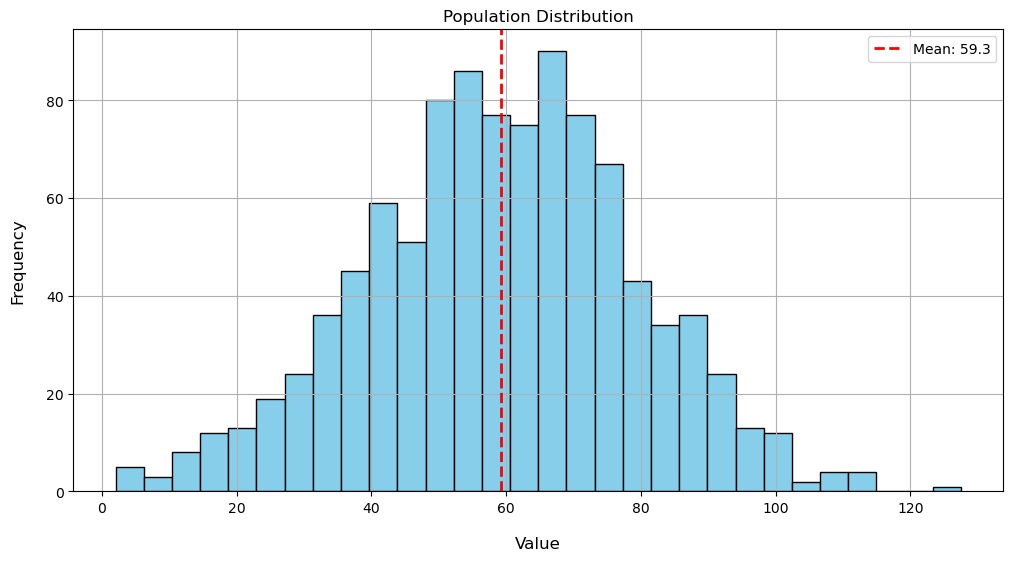

In [3]:
# 母数の設定
nums_1, mu_1, sigma_1 = 1000, 60, 20 #mu は平均で、 sigma は標準偏

# 母集団の生成
population = [random.normalvariate(mu_1, sigma_1) for _ in range(nums_1)]

# デフォルト値を使用して統計値を計算
p_mean_generated = np.mean(population)
p_var_generated = np.var(population, ddof=0)
p_sd_generated = np.std(population, ddof=0)

# 計算結果の出力
print("今回は既知の真の母平均 = ", round_it(p_mean_generated))  # 設定としては mu_1
print("今回は既知の真の母分散 = ", round_it(p_var_generated))
print("今回は既知の真の母集団の標準偏差 = ", round_it(p_sd_generated))  # 設定としては sigma_1

# 母集団のヒストグラムを描画
fig, ax_1 = plt.subplots(figsize=(12, 6), nrows=1, ncols=1)

# ヒストグラムのスタイルを調整
ax_1.hist(population, bins=30, color='skyblue', edgecolor='black')
ax_1.set_title("Population Distribution", size='large')
ax_1.set_xlabel("Value", labelpad=15, size='large')
ax_1.set_ylabel("Frequency", labelpad=15, size='large')
ax_1.axvline(x=p_mean_generated, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {round_it(p_mean_generated)}')
ax_1.grid(True)
ax_1.legend()

# プロットの表示
plt.show()


##ランダムサンプリングして標本平均を算出

In [4]:
# 母集団から標本を生成
num_sam = 80
sample_1 = random.sample(population, num_sam)

# numpyを使用して標本の統計値を計算し、自作の丸め関数で丸める
sample_mean = np.mean(sample_1)
sample_std = np.std(sample_1, ddof=0)  # ddof=0 にすることで標本標準偏差（分散の平方根が算出される）

# 結果の出力
print("標本平均 =", round_it(sample_mean), "\n標本標準偏差 =", round_it(sample_std))

標本平均 = 60.25 
標本標準偏差 = 19.51


#中心極限定理/大数の法則のモンテカルロ

今回は既知の真の母平均 =  59.3
モンテカルロシミュレーションの標本平均は=  59.32


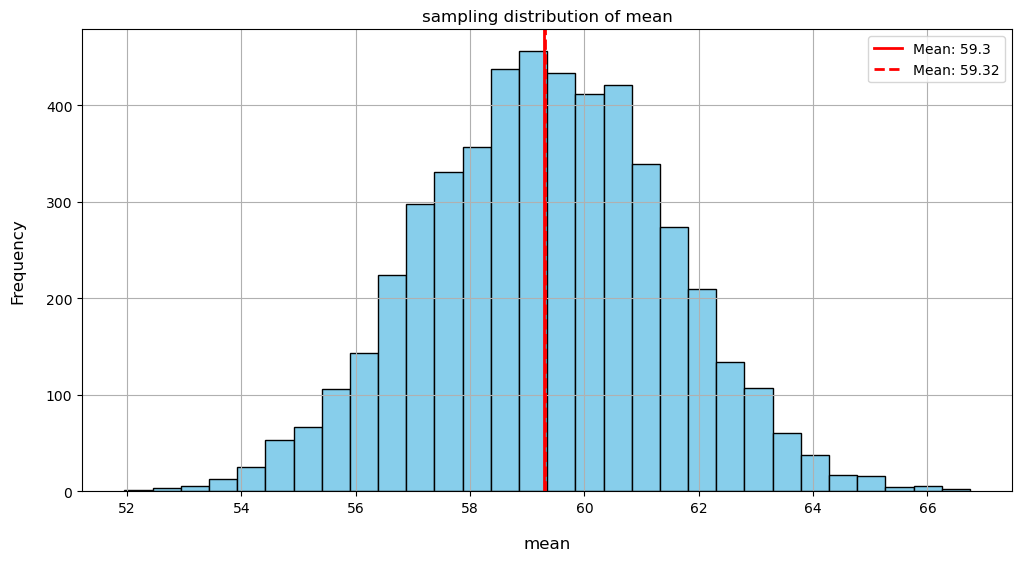

In [5]:
num_choice = 5000
list_mean =[]

for i in range(0,num_choice):
  #ランダムサンプリング
  x = random.sample(population, num_sam)
  #標本平均
  mean =np.mean(x)
  list_mean.append(mean)

mean_list_mean =  np.mean(list_mean)

target = list_mean
fig, ax_1 = plt.subplots(figsize=(12, 6),nrows=1,ncols=1)#,sharex="col"
ax_1.hist(target, bins=30, color='skyblue', edgecolor='black')
ax_1.set_title("sampling distribution of mean", size='large')
ax_1.set_xlabel("mean", labelpad=15, size='large')
ax_1.set_ylabel("Frequency", labelpad=15, size='large')
ax_1.axvline(x=p_mean_generated, color='red', linestyle='solid', linewidth=2, label=f'Mean: {round_it(p_mean_generated)}')
ax_1.axvline(x=mean_list_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {round_it(mean_list_mean)}')
ax_1.grid(True)
ax_1.legend()

print("今回は既知の真の母平均 = ",round_it(p_mean_generated))#設定としてはmu_1
print("モンテカルロシミュレーションの標本平均は= ",round_it(mean_list_mean))#設定としてはmu_1

#分散と不偏分散のモンテカルロ

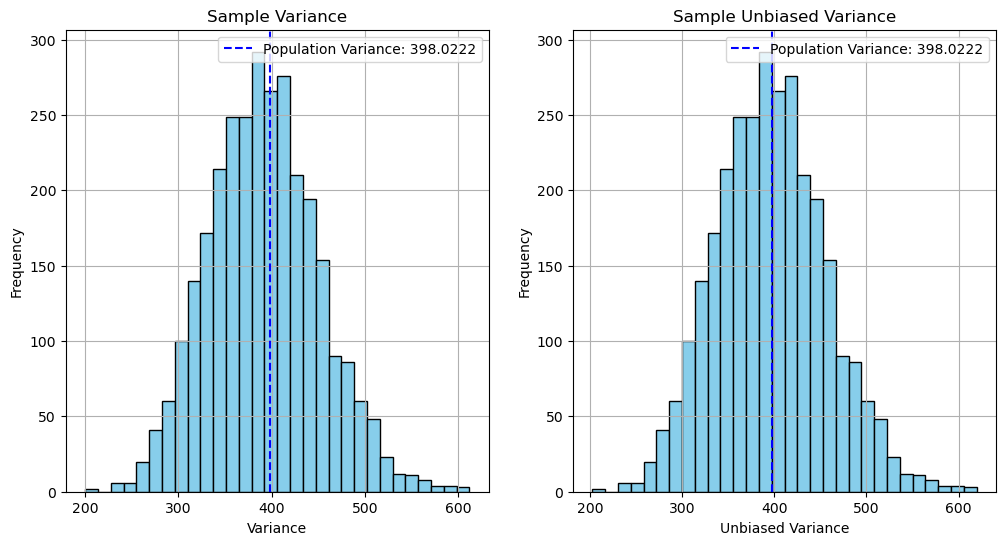

今回は既知の母分散は 398.0222, 分散の平均は 391.7982, 不偏分散の平均は 396.7576
今回は既知の母分散は 398.0222, 分散の中央値は 390.0579, 不偏分散の中央値は 394.9953


C:\Users\msy-t\AppData\Local\Temp\ipykernel_20996\2216639525.py:58: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_var_s = stats.mode(rounded_list_var_s)[0]
C:\Users\msy-t\AppData\Local\Temp\ipykernel_20996\2216639525.py:59: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [18]:
# 標本分散と不偏分散を計算するためのリストを準備
list_var_s = []
list_var_p = []

for i in range(3000):  # 3000回のランダムサンプリング
    # ランダムサンプリング
    x = random.sample(population, num_sam)
    # 標本分散
    var_s = np.var(x, ddof=0)
    list_var_s.append(var_s)
    # 不偏分散
    var_p = np.var(x, ddof=1)
    list_var_p.append(var_p)

# ヒストグラムの描画
fig = plt.figure(figsize=(12.0, 6.0))
ax_s = fig.add_subplot(1, 2, 1)  # (nrows, ncols, index)
ax_p = fig.add_subplot(1, 2, 2)

# スタイルを調整してヒストグラムを描画
ax_s.hist(list_var_s, bins=30, color='skyblue', edgecolor='black')
ax_p.hist(list_var_p, bins=30, color='skyblue', edgecolor='black')

# ラベルとタイトルの設定
ax_s.set_xlabel('Variance')
ax_p.set_xlabel('Unbiased Variance')
ax_s.set_ylabel('Frequency')
ax_p.set_ylabel('Frequency')
ax_s.set_title('Sample Variance')
ax_p.set_title('Sample Unbiased Variance')

# 母分散の真の値の線を追加
ax_s.axvline(x=p_var_generated, color="blue", ls='dashed', label=f'Population Variance: {p_var_generated:.4f}')
ax_p.axvline(x=p_var_generated, color="blue", ls='dashed', label=f'Population Variance: {p_var_generated:.4f}')

# 凡例を追加
ax_s.legend()
ax_p.legend()

# 図を表示
ax_s.grid(True)
ax_p.grid(True)

plt.show()

# 分散と不偏分散の平均

print("今回は既知の母分散は {:.4f}, 分散の平均は {:.4f}, 不偏分散の平均は {:.4f}".format(p_var_generated, np.mean(list_var_s), np.mean(list_var_p)))#本当はround_itを使う

# 分散と不偏分散の中央値
print("今回は既知の母分散は {:.4f}, 分散の中央値は {:.4f}, 不偏分散の中央値は {:.4f}".format(p_var_generated, np.median(list_var_s), np.median(list_var_p)))#本当はround_itを使う

# 標本分散と不偏分散のリストの値を丸める
rounded_list_var_s = [round_it(value) for value in list_var_s]
rounded_list_var_p = [round_it(value) for value in list_var_p]

# scipyのmode関数を使用して、丸めたリストの最頻値を計算
mode_var_s = stats.mode(rounded_list_var_s)[0]
mode_var_p = stats.mode(rounded_list_var_p)[0]

# 最頻値を表示
print("今回は既知の母分散は {:.4f}, 分散の最頻値は {:.4f}, 不偏分散の最頻値は {:.4f}".format(p_var_generated, mode_var_s, mode_var_p))

In [8]:
'''
fig, axes = plt.subplots(figsize=(12, 6),nrows=1,ncols=3)#,sharex="col"
ax_1,ax_2,ax_3 = axes.flatten()

ax_1.hist(population, bins=30)
ax_1.set_title("population",size='large')
ax_1.set_ylabel("freq",labelpad=15,size='large')

ax_2.hist(list_mean, bins=30)
ax_2.set_title("sampling distribution of mean",size='large')
ax_2.axvline(x=sta.mean(list_mean) ,color="blue",ls='dashed')

ax_3.hist(list_var_p, bins=30)
ax_3.set_title("sampling distribution of var_p ")
ax_3.axvline(x=sta.mean(list_var_p),color="blue",ls='dashed')

fig.text(0.55,0.6,round_it(sta.mean(list_mean),4))
fig.text(0.8,0.6,round_it(sta.mean(list_var_p),4))
fig.suptitle("Description of Central limit theorem, law of large numbers")
fig.show()
'''

'\nfig, axes = plt.subplots(figsize=(12, 6),nrows=1,ncols=3)#,sharex="col"\nax_1,ax_2,ax_3 = axes.flatten()\n\nax_1.hist(population, bins=30)\nax_1.set_title("population",size=\'large\')\nax_1.set_ylabel("freq",labelpad=15,size=\'large\')\n\nax_2.hist(list_mean, bins=30)\nax_2.set_title("sampling distribution of mean",size=\'large\')\nax_2.axvline(x=sta.mean(list_mean) ,color="blue",ls=\'dashed\')\n\nax_3.hist(list_var_p, bins=30)\nax_3.set_title("sampling distribution of var_p ")\nax_3.axvline(x=sta.mean(list_var_p),color="blue",ls=\'dashed\')\n\nfig.text(0.55,0.6,round_it(sta.mean(list_mean),4))\nfig.text(0.8,0.6,round_it(sta.mean(list_var_p),4))\nfig.suptitle("Description of Central limit theorem, law of large numbers")\nfig.show()\n'

#信頼区間
ランダムサンプリングを繰り返した時に95%の確率で生起する統計量の区間   
例えば標本平均   
注意：厳密には母平均の信頼区間ではない。考えたかに拠るがある瞬間の母平均は定数。これを変動すると考えるのがベイズで，母平均の確信区間を算出するのはベイズ統計

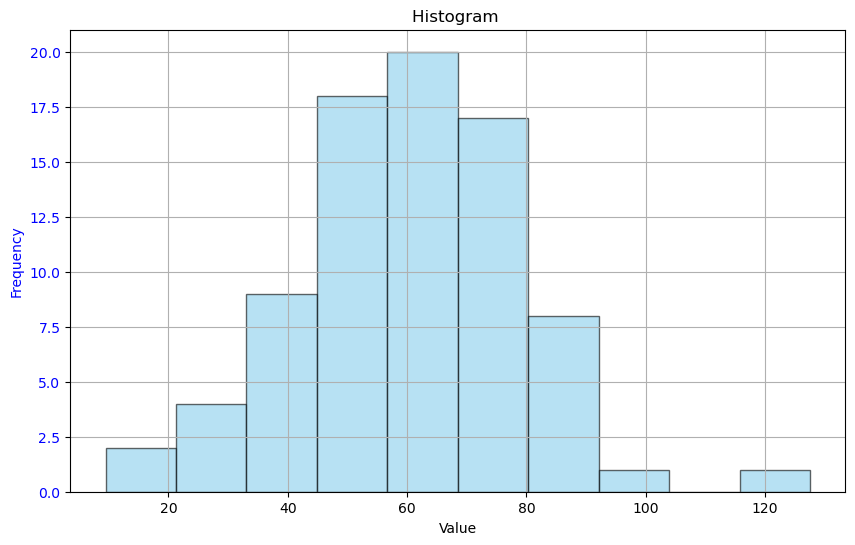

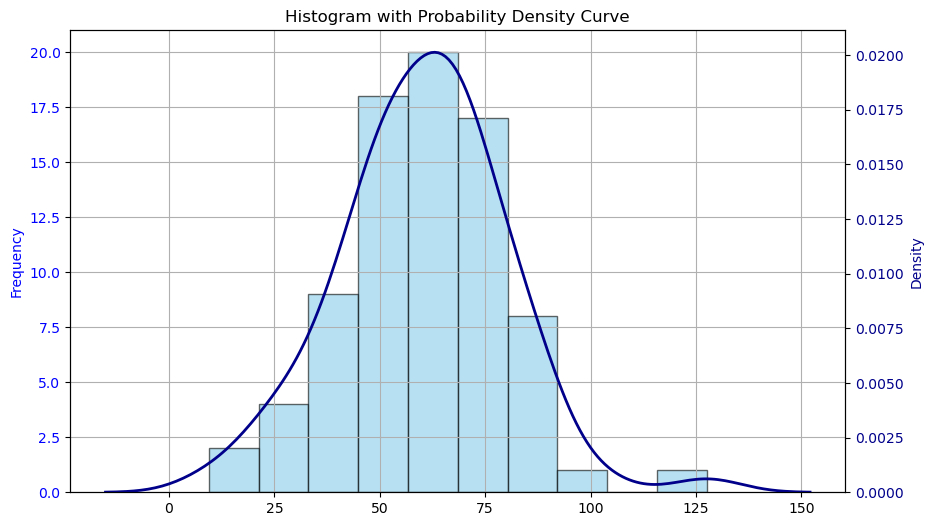

scipy.stats.semで計算した標準誤差は 2.195353296
ステップ毎に計算した標準誤差は 2.195353296
標準誤差は 2.209
信頼区間は 55.88 < 60.25 < 64.62


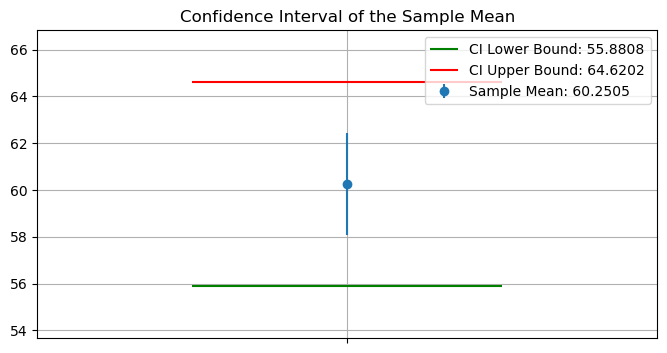

In [9]:
# sample_1 = random.sample(population, num_sam)
target = sample_1

fig, ax1 = plt.subplots(figsize=(10, 6))

## ヒストグラムを描画し、頻度を左側のY軸に表示
counts, bins, bars = ax1.hist(target, bins=10, density=False, alpha=0.6, color='skyblue', edgecolor='black', label='Frequency')
ax1.set_ylabel('Frequency', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.title('Histogram ')
plt.xlabel('Value')
ax1.grid(True)
plt.show()

# ヒストグラムと確率密度曲線を重ねて描画
fig, ax1 = plt.subplots(figsize=(10, 6))

## ヒストグラムを描画し、頻度を左側のY軸に表示
counts, bins, bars = ax1.hist(target, bins=10, density=False, alpha=0.6, color='skyblue', edgecolor='black', label='Frequency')
ax1.set_ylabel('Frequency', color='b')
ax1.tick_params(axis='y', labelcolor='b')

## 確率密度曲線のための右側Y軸を追加
ax2 = ax1.twinx()
sns.kdeplot(target, color="darkblue", linewidth=2, ax=ax2)
ax2.set_ylabel('Density', color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')

plt.title('Histogram with Probability Density Curve')
plt.xlabel('Value')
ax1.grid(True)
plt.show()

#信頼区間の計算
sample = sample_1
sample_mean = np.mean(sample)  # 標本平均
deg_of_f = len(sample)-1
se_1 = stats.sem(sample, axis=0, ddof=1)#自由度じゃなくて調整値を入れる
print("scipy.stats.semで計算した標準誤差は",round_it(se_1,10))

mean = np.mean(sample)  # 標本平均
n = len(sample)  # 標本数
p_var = np.var(sample,ddof=1)  # 不偏分散（偏差平方和をn-1で除した値）
deg_of_f = len(sample)-1  # 自由度
se_2 = math.sqrt(p_var/deg_of_f)
print("ステップ毎に計算した標準誤差は",round_it(se_1,10))
print("標準誤差は",round_it(se_2))

ci_lower, ci_upper = stats.t.interval(confidence=0.95,df=deg_of_f,loc=sample_mean,scale=se_1)
print("信頼区間は",round_it(ci_lower),"<",round_it(sample_mean),"<",round_it(ci_upper))

# 図の作成
plt.figure(figsize=(8, 4))
plt.errorbar(1, sample_mean, yerr=se_1, fmt='o', label=f'Sample Mean: {sample_mean:.4f}')
plt.hlines(y=ci_lower, xmin=0.9, xmax=1.1, colors='green', label=f'CI Lower Bound: {ci_lower:.4f}')
plt.hlines(y=ci_upper, xmin=0.9, xmax=1.1, colors='red', label=f'CI Upper Bound: {ci_upper:.4f}')
plt.xlim(0.8, 1.2)
plt.ylim(sample_mean - se_1 * 3, sample_mean + se_1 * 3)
plt.xticks([1], [''])
plt.title('Confidence Interval of the Sample Mean')
plt.grid(True)
plt.legend()
plt.show()

##解釈

Aグラムの製品を大量に製造している。   
Aグラムの製品を〇%で信頼して製造できるシステムになっているかを考察したい。   
B個をランダムサンプリングした。   
標本平均，〇%信頼区間が分かった。   
Aグラムは信頼区間の外側だった。   
この時，考えられること，疑われる事は何か。   
手元に標本平均は疑うことのできない事実。   
疑うべきは何か？システムである。   
ランダムサンプリングを繰り返した時に，標本平均は少なくとも95%の確率でAグラムにはならない。Aグラムになる確率は5%以下である。   

**知れたこと：**   
サンプリング分布に正規性を仮定すると，Aグラムの製品を大量に製造しているとは考えづらいシステムであることを，B個のランダムサンプリングから推測することができた。   
これが母平均の信頼区間の解釈例。
なお母平均の統計的仮説検定（一標本t検定）と結果は完全に一致する。

#母平均の統計的仮説検定，t検定の一標本   


In [10]:
# 母平均がmu_testとする一標本のt検定を実施
mu_test = 65

# 標本平均、t統計量、p値、自由度，標準誤差，信頼区間を計算
sample_mean = np.mean(sample_1)
t_stat, p_value = stats.ttest_1samp(sample_1, mu_test)
df = len(sample_1) - 1  # 自由度
se_1 = stats.sem(sample, axis=0, ddof=1)#自由度じゃなくて調整値を入れる
ci_lower, ci_upper = stats.t.interval(confidence=0.95,df=deg_of_f,loc=sample_mean,scale=se_1)


# t検定の結果を出力
print(f"検定統計量t: {t_stat:.4}, 自由度: {df}, p値: {p_value:.4}")
print("95%信頼区間は",f"{ci_lower:.4} < {sample_mean:.4} < {ci_upper:.4}")

検定統計量t: -2.163, 自由度: 79, p値: 0.03353
95%信頼区間は 55.88 < 60.25 < 64.62


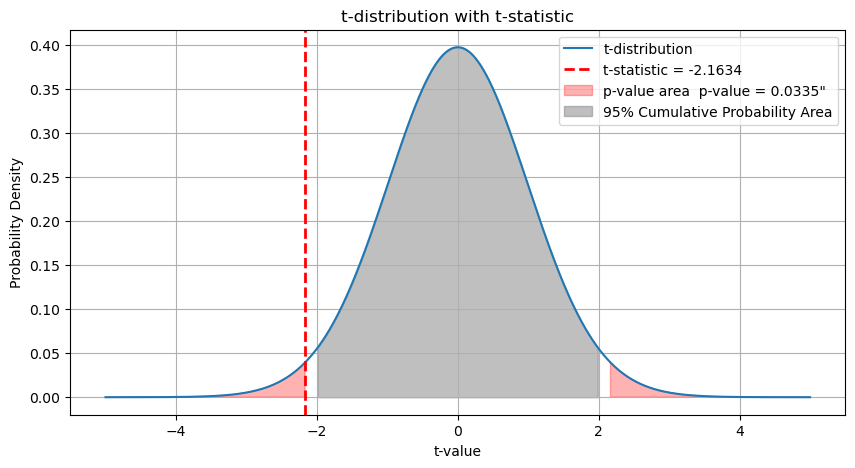

検定統計量t: -2.1634, 自由度: 79, p値: 0.0335
95%信頼区間は 55.8808 < 60.2505 < 64.6202


In [11]:
# 母平均がmu_testとする一標本のt検定を実施
mu_test = 65

# 標本平均、t統計量、p値、自由度，標準誤差，信頼区間を計算
sample_mean = np.mean(sample_1)
t_stat, p_value = stats.ttest_1samp(sample_1, mu_test)
df = len(sample_1) - 1  # 自由度
se_1 = stats.sem(sample, axis=0, ddof=1)#自由度じゃなくて調整値を入れる
ci_lower, ci_upper = stats.t.interval(confidence=0.95,df=deg_of_f,loc=sample_mean,scale=se_1)

#図の作成

## t分布のプロット用の値を生成
t_values = np.linspace(-5, 5, 1000)
t_dist = stats.t.pdf(t_values, df)

## t分布にt検定統計量の値を重ねてプロット
plt.figure(figsize=(10, 5))
plt.plot(t_values, t_dist, label='t-distribution')

## t統計量に線を引く
plt.axvline(t_stat, color='red', linestyle='dashed', linewidth=2, label=f't-statistic = {t_stat:.4f}')

## p値に相当する領域を塗りつぶし
plt.fill_between(t_values, t_dist, where=(t_values >= abs(t_stat)) | (t_values <= -abs(t_stat)), color='red', alpha=0.3, label=f'p-value area  p-value = {p_value:.4f}"')

## t分布の累積確率95%の範囲について、その領域を塗りつぶして表示する
### 両側95%信頼区間のために累積確率の上側2.5%を計算
critical_t = stats.t.ppf(0.975, df)
ci_area_lower = -critical_t
ci_area_upper = critical_t
### 累積確率95%の範囲を示す領域を塗りつぶし
plt.fill_between(t_values, t_dist, where=(t_values >= ci_area_lower) & (t_values <= ci_area_upper), color='grey', alpha=0.5, label='95% Cumulative Probability Area')

## グラフの装飾と表示
plt.legend()
plt.title('t-distribution with t-statistic')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

# 結果の出力
print(f"検定統計量t: {t_stat:.4f}, 自由度: {df}, p値: {p_value:.4f}")
print(f"95%信頼区間は {ci_lower:.4f} < {sample_mean:.4f} < {ci_upper:.4f}")

##解釈   
Aグラムの製品を大量に製造している。   
Aグラムの製品を製造できるシステムになっているかを考えたい。   
B個をランダムサンプリングした。   
帰無仮説は母平均はAグラムと言える（Aグラムと有意な差があるとは言えない）
@@@差がないではない@@@
対立仮説は母平均は70グラムとは言えない。（Aグラムと有意に差がある）
標本平均，検定統計量（＋推測統計量）が分かった。
帰無仮説だ正しいとした場合の確率分布（帰無分布）に検討統計量を位置付けると，p値が分かった。
P値が有意水準を下回った。   
Aグラムの製造システムができている（Aグラムと差が無い）と仮定すると(帰無仮説)，標本平均は95%信頼区間の外側にある極めて稀な確率で観測される値である(p値)。    
この時，考えられること，疑われる事は何か。   
手元に標本平均は疑うことのできない事実。      
疑うべきは何か？(棄却する仮説は何か)
仮定が間違っていた(帰無仮説の棄却，対立仮説の採用)

**知れたこと：**   
サンプリング分布に正規性を仮定すると，Aグラムの製品を大量に製造しているとは考えづらいシステムであることを，B個のランダムサンプリングから推測することができた。   
これが一標本のt検定。
なお信頼区間と結果は完全に一致する。

@@正規性の仮定，効果量，検定力などの諸注意は割愛したが，卒業研究などは勉強必須

# 発展/余談？


## サンプル数（自由度）と信頼区間の関係(検定統計量に影響する要因)

In [12]:
# 標本サイズ、平均、標準偏差の設定
sample_sizes = [20, 30, 100, 1000]
mu_4 = 60
sigma_4 = 10

# 各標本サイズについて信頼区間を計算
for nums_4 in sample_sizes:
    # 標本データを生成
    x_norm_4 = np.random.normal(mu_4, sigma_4, nums_4)
    # 不偏分散と標本平均
    p_var = np.var(x_norm_4, ddof=1)
    s_mean = np.mean(x_norm_4)
    # 標本数と自由度
    n = len(x_norm_4)
    deg_of_f = n - 1
    # 信頼区間の計算
    bottom, up = stats.t.interval(confidence=0.95, df=deg_of_f, loc=s_mean, scale=np.sqrt(p_var/n))
    # 結果の表示
    print(f'サイズ {nums_4}: {bottom:.2f} < μ < {up:.2f}')


サイズ 20: 57.19 < μ < 66.82
サイズ 30: 51.54 < μ < 60.81
サイズ 100: 58.66 < μ < 62.45
サイズ 1000: 59.86 < μ < 61.12


##p値，クリティカル値の算出

In [13]:
t_value = 3
df = 10

# 両側検定のp値
p_value_two_tail = (1 - stats.t.cdf(abs(t_value), df)) * 2
print("p_value = ",p_value_two_tail)


df = 1000
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df)
print("t_critical = ",t_critical)  # これが t_{0.025, 10} の値

p_value =  0.013343655022569623
t_critical =  1.9623390808264074
